## Import Libraries

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore")

## Create Data

In [2]:
data = np.array([[85, 90], [70, 75], [60, 65], [40, 50], [30, 35]])

## Apply K-Means

In [3]:
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans.fit(data)  
labels = kmeans.labels_
labels

array([0, 0, 0, 1, 1])

## Show Cluster Centers

In [4]:
print("Cluster Centers:\n\n", kmeans.cluster_centers_)

Cluster Centers:

 [[71.66666667 76.66666667]
 [35.         42.5       ]]


## Visualize Clusters

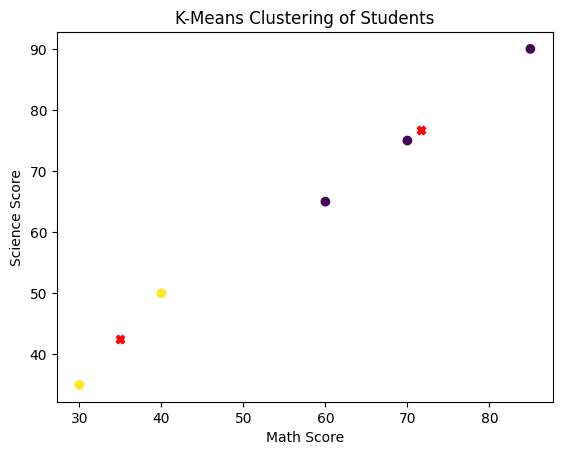

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X')  
plt.xlabel("Math Score")  
plt.ylabel("Science Score")  
plt.title("K-Means Clustering of Students")  
plt.show()

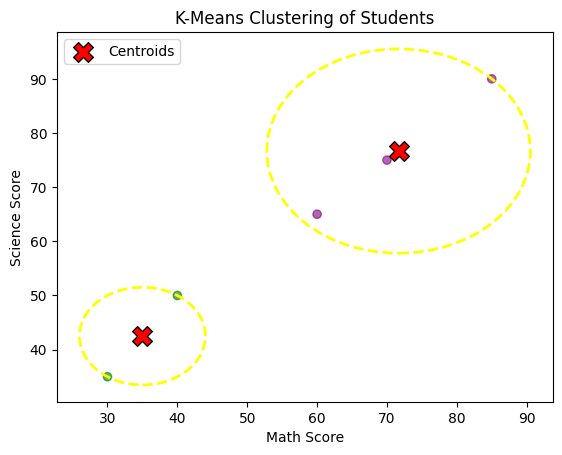

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define custom colors for each cluster
colors = ['purple', 'green']  # Assuming 2 clusters (C1 = pink, C2 = green)
cluster_colors = np.array([colors[label] for label in labels])  # Assign colors based on labels

# Scatter plot of data points with custom colors
plt.scatter(data[:, 0], data[:, 1], c=cluster_colors, alpha=0.6)

# Scatter plot of cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, edgecolors='black', label="Centroids")

# Add circles around clusters
for i in range(len(kmeans.cluster_centers_)):
    cluster_center = kmeans.cluster_centers_[i]
    cluster_points = data[labels == i]  # Get points in the cluster
    radius = np.max(np.linalg.norm(cluster_points - cluster_center, axis=1))  # Max distance in cluster
    circle = plt.Circle(cluster_center, radius, color='yellow', fill=False, linestyle='dashed', linewidth=2)
    plt.gca().add_patch(circle)

plt.xlabel("Math Score")
plt.ylabel("Science Score")
plt.title("K-Means Clustering of Students")
plt.legend()
plt.show()

## Testing & Evaluation of K-Means

### Elbow Method

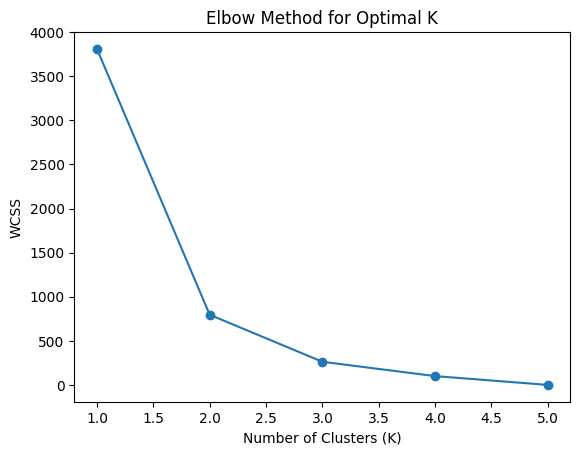

In [8]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

### Silhouette Score

In [9]:
# Apply K-Means with the chosen number of clusters
optimal_k = 2  # Set this based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5490040667582038


### Davies-Bouldin Index (DBI)

In [10]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(data, kmeans.labels_)
print("Davies-Bouldin Index:", dbi)

Davies-Bouldin Index: 0.43067762811655563


In [11]:
import joblib

# Save the trained K-Means model
joblib.dump(kmeans, "kmeans_model.pkl")
print("Model saved successfully!")

Model saved successfully!
